In [1]:
import mne
import os.path as op
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_path = op.join('C:/Users/csilv/Desktop/UNB Gama/7 Semestre/Processamento de Sinais/Normal_Subject_01.edf') #Define data_path
#data_path = op.join('D:/My Drive/Estudos/Engenharia Eletrônica - UnB/7º semestre/Processamento de Sinais/Projeto Final/Dataset/Normal_Subject_01.edf')
raw = mne.io.read_raw_edf(data_path) #read raw data

Extracting EDF parameters from C:\Users\csilv\Desktop\UNB Gama\7 Semestre\Processamento de Sinais\Normal_Subject_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [5]:
raw.info['chs'][0]['kind'] = 202
raw.info['chs'][1]['kind'] = 202
raw.info['chs'][2]['kind'] = 202
raw.info['chs'][3]['kind'] = 202
raw.info['chs'][18]['kind'] = 202
raw.info['chs'][19]['kind'] = 202

In [6]:
raw.info['bads'] = ['EMG', 'EMG1', 'EMG2', 'ECGII']

In [7]:
picks = mne.pick_types(raw.info, eeg=True, eog= True, exclude = raw.info['bads'])

Effective window size : 8.000 (s)


<ipython-input-8-ea26a4a30767>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  without_filter = raw.plot_psd(fmax = 60)


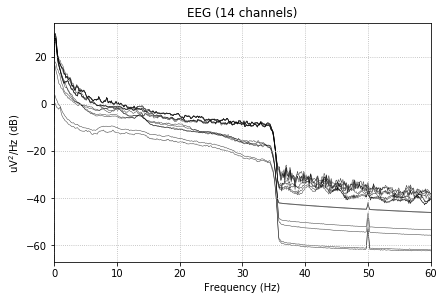

In [8]:
without_filter = raw.plot_psd(fmax = 60)

In [9]:
raw.load_data()
raw.notch_filter(np.arange(50, 100, 50), picks=picks, fir_design='firwin') #notch filter at 50, 100, 150 and 200

Reading 0 ... 7366399  =      0.000 ... 28774.996 secs...
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)



<RawEDF  |  Normal_Subject_01.edf, n_channels x n_times : 24 x 7366400 (28775.0 sec), ~1.32 GB, data loaded>

In [10]:
#notch_filter = raw.plot_psd(area_mode='range', picks=picks, average=False, tmax=10.0)

In [11]:
raw.filter(None, 40., picks=picks, fir_design='firwin') # low pass filtering below 40 Hz'
#low_pass_filter = raw.plot_psd(area_mode='range', picks=picks, average=False, tmax=10.0)

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 85 samples (0.332 sec)



<RawEDF  |  Normal_Subject_01.edf, n_channels x n_times : 24 x 7366400 (28775.0 sec), ~1.32 GB, data loaded>

In [12]:
raw.filter(1., None, picks=picks, fir_design='firwin') #high pass filtering above 1Hz
#high_pass_filter = raw.plot_psd(area_mode='range', picks=picks, average=False, tmax=10.0)

Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 sec)



<RawEDF  |  Normal_Subject_01.edf, n_channels x n_times : 24 x 7366400 (28775.0 sec), ~1.32 GB, data loaded>

In [13]:
raw.info['ch_names']

['EOG1',
 'EOG2',
 'EOG1A1',
 'EOG2A1',
 'C4A1',
 'C3A2',
 'F3',
 'F4',
 'C3',
 'C4',
 'A1',
 'A2',
 'O1',
 'O2',
 'ECGII',
 'EMG',
 'EMG1',
 'EMG2',
 'EOG1A2',
 'EOG2A2',
 'F3A2',
 'F4A1',
 'O1A2',
 'O2A1']

In [14]:
events = mne.make_fixed_length_events(raw, duration = 30.)

In [15]:
reject = dict(eeg = 150e-6, eog = 250e-6)

In [16]:
epochs = mne.Epochs(raw, events=events, picks=picks, reject=None, preload=True, tmin=-1.5, tmax=1.5) #Define trials

959 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 959 events and 769 original time points ...
1 bad epochs dropped


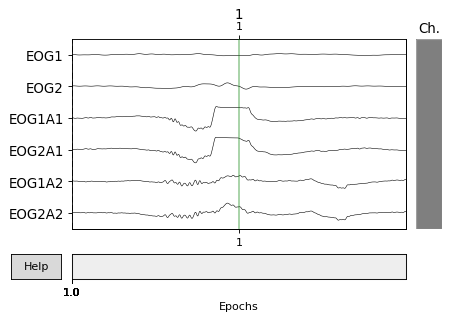

In [17]:
top = epochs[4].plot(picks=['EOG1A1', 'EOG1A2', 'EOG2A1', 'EOG2A2', 'EOG1', 'EOG2'])

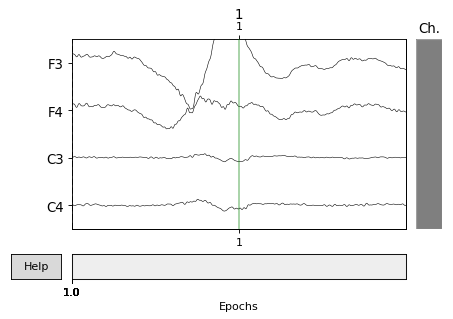

In [18]:
# 1. Decompose the data onto a set of components (i.e., rotate to new axes) using a BSS algorithm.

no_plot = epochs[4].plot(picks=['F3', 'F4', 'C3', 'C4'])

In [19]:
toSobi = epochs[4].get_data()

In [20]:
toSobi.shape

(1, 20, 769)

In [21]:
# %load sobi.py
import numpy as np
import itertools
import random

def time_lagged_cov(X, num_lags):

    N = X.shape[0]
    L = X.shape[1] - num_lags
    R = np.empty([num_lags,N,N])

    center = lambda x: x-x.mean(1)[:,None]

    X0 = center(X[:, 0:(0+L)])
    
    for k in range(num_lags):
        Xk = center(X[:,k:(k+L)])
        R[k] = (1.0/L)*(X0.dot(Xk.T))
        R[k] = 0.5*(R[k] + R[k].T)

    return R


def prewhiten(X):

    # subtract mean
    Xw = X - X.mean(1)[:, None]

    # Compute SVD
    U,s,V = np.linalg.svd(Xw, full_matrices=False)
    Sinv = np.linalg.pinv(np.diag(s))

    # Find principal components
    Q  = np.dot(Sinv, U.T)
    Xw = Q.dot(X)

    return Q, Xw


def submat_mul(X, i, j, R, multype='post'):

    if multype.lower() == 'post':
        idx_i = (..., i)
        idx_j = (..., j)
    elif multype.lower() == 'pre':
        idx_i = (..., i, slice(None))
        idx_j = (..., j, slice(None))

     # In place multiplication X*R
    col_i = X[idx_i]*1.0
    col_j = X[idx_j]*1.0
    X[idx_i] = R[0,0]*col_i + R[0,1]*col_j
    X[idx_j] = R[1,0]*col_i + R[1,1]*col_j

    return X

def max_eigvec(A):
    # Find eigenvector associated with largest eigenvalue
    [eigvals,v] = np.linalg.eigh(A)
    v = v[:,-1]
    return v

def generate_index_pairs(idx_range, random_order=True):
    ij_pairs = itertools.combinations(idx_range, 2)
    ij_pairs = list(ij_pairs)
    if random_order:
        random.shuffle(ij_pairs)
    
    return ij_pairs

def off(X):
    off_ = 0
    for x in X:
        off_ += (np.linalg.norm(x,ord='fro')**2 - np.linalg.norm(np.diag(x))**2)

    return off_/np.max(X)

def jd(X, eps=1.0e-6, random_order = True):

    """jointly diagonalize several matrices.

    Performs jacobi-like procedure to approximately diagonalize
    a set of matrices X

    Parameters
    ----------
    X : np.ndarray
        Has dimensions [num_matrices, num_rows, num_cols]
    eps : scalar, optional
        Stopping criterion based on eps tolerance, should be between 0 and infinity
    random_order : bool, optional
        If True, pivots will cycle randomly for givens rotations.
        May affect convergence rate but not the final soltuion

    Returns
    -------
    V : np.ndarray
        2D array containing diagonalizing transformation
        i.e. (V.T).dot( X ).dot( V ) will be approximately diagonal
    
    """

    X = np.atleast_3d(X)
    V = np.eye(X.shape[1])

    keep_going = True
    counter = 0
    off_val = []
    while keep_going:
        print('{}: {}'.format(counter, off(X)))
        counter += 1
        keep_going = False

        ij_pairs = generate_index_pairs(range(X.shape[1]), 
                                        random_order = random_order)
        
        for (i,j) in ij_pairs:
            # Extract submatrix
            idx = (slice(None), ) + np.ix_([i,j],[i,j])
            A = X[idx]*1.0

            # Find givens rotation matrix
            R = find_givens_rotation(A)

            if abs(R[0,1]) > eps: # sin_theta = R[0,1]
                keep_going = True 
                # Update X and V matrices

                # X' = R^T X R
                X = submat_mul(X, i, j, R, multype='post')
                X = submat_mul(X, i, j, R, multype='pre')

                # V = V R
                V = submat_mul(V, i, j, R, multype='post')

    return V

def find_givens_rotation(A):

    """
    Belouchrani, A., et al. “A Blind Source Separation Technique Using 
    Second-Order Statistics.” IEEE Transactions on Signal Processing: 
    A Publication of the IEEE Signal Processing Society, vol. 45, 
    no. 2, Feb. 1997, pp. 434–44, doi:10.1109/78.554307.

    See Appendix A
    """
    G   = np.array( [ A[:,0,0] - A[:,1,1], A[:,0,1] + A[:,1,0] ] )
    G   = np.atleast_2d(G).T
    GHG = np.dot(G.T, G)
    v = max_eigvec(GHG)
    
    v = np.sign(v[0])*v
    cos_theta = np.sqrt(0.5 + 0.5*v[0])
    sin_theta = -0.5*v[1]/(cos_theta)

    R = np.array([[ cos_theta,  -sin_theta],
                    [ sin_theta, cos_theta]])

    return R

def sobi(X, num_lags=None, eps=1.0e-6, random_order = True):

    """blind source separation technique using SOBI algorithm

    The "second-order blind source idenitification" algorithm is 
    a blind-source separation technique that works by jointly diagonalizing
    a set of time-lagged covariance matrices. 

    Parameters
    ----------
    X : np.ndarray
        Has dimensions [num_signals, num_samples]
    num_lags : int
        Number of time-lags to use in forming covariance matrices
    eps : scalar, optional
        Stopping criterion based on eps tolerance, should be between 0 and infinity
    random_order : bool, optional
        If True, pivots will cycle randomly for givens rotations.
        May affect convergence rate but not the final soltuion

    Returns
    -------
    S : np.ndarray
        2D array containing estimated source signals
    
    A : np.ndarray
        2D array containing mixing matrix
        i.e. A.dot(S) = X
    
    W : np.ndarray
        2D array containing unmixing matrix
        i.e. W.dot(X) = S
    
    """

    if num_lags is None:
        num_lags = np.minimum(1000, int(X.shape[1]/2))

    Q, Xw = prewhiten(X)

    R = time_lagged_cov(Xw, num_lags)

    V = jd(R*1.0, eps=eps)

    W = (V.T).dot(Q)
    A = np.linalg.pinv(W)
    S = W.dot(X)

    return S, A, W


    
    




In [22]:
[S, A, W] = sobi(toSobi[0])

0: 1.0395053622479473
1: 1.0534093152462283
2: 0.9844949543397558
3: 0.9619481078380564
4: 0.9525779409082811
5: 0.9233334617597073
6: 0.9046446903335622
7: 0.8977532053294377
8: 0.8917276196045316
9: 0.8902466654438319
10: 0.8903936374768059
11: 0.891437567343797
12: 0.8927420053794355
13: 0.8947558674409852
14: 0.8948458557738185
15: 0.8984479411837382
16: 0.8978747050459371
17: 0.9005246462858505
18: 0.9029403319247528
19: 0.9048637799736672
20: 0.9074305149273006
21: 0.909661770337261
22: 0.9103570330873929
23: 0.9119191904011428
24: 0.9158988740707772
25: 0.9191727059002358
26: 0.9186627268314936
27: 0.9229025342336655
28: 0.9251958364826114
29: 0.9271446344516944
30: 0.9305782798847376
31: 0.933817194138129
32: 0.9379456503927649
33: 0.939482521398895
34: 0.9447106700262724
35: 0.9470991137901029
36: 0.9484708138989777
37: 0.9501458942745123
38: 0.949304491889162
39: 0.9487921347774979
40: 0.9482441262568339
41: 0.9475786801713221
42: 0.9472875910935029
43: 0.9466963132307072
44:

In [23]:
S.shape

(20, 769)

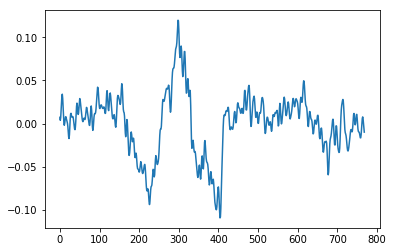

In [24]:
plt.plot(S[6])

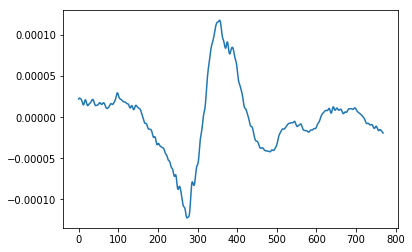

In [25]:
plt.plot(toSobi[0][6])

In [26]:
# 2. Reverse the sign on all lower and horizontal EOG channels (i.e., multiply signals by  -1)
# and again decompose data onto components using a BSS algorithm. Flag those components that invert.

epochs.ch_names

['EOG1',
 'EOG2',
 'EOG1A1',
 'EOG2A1',
 'C4A1',
 'C3A2',
 'F3',
 'F4',
 'C3',
 'C4',
 'A1',
 'A2',
 'O1',
 'O2',
 'EOG1A2',
 'EOG2A2',
 'F3A2',
 'F4A1',
 'O1A2',
 'O2A1']

In [27]:
EOG_ch=[0, 1, 2, 3, 14, 15]

In [29]:
for n in EOG_ch:
    print(epochs.ch_names[n])

EOG1
EOG2
EOG1A1
EOG2A1
EOG1A2
EOG2A2


In [30]:
inv_EOG=epochs[4].get_data()

In [31]:
inv_EOG.shape

(1, 20, 769)

In [38]:
inv_EOG = -inv_EOG

#for n in EOG_ch:
#    inv_EOG[0][n] = -inv_EOG[0][n]

In [39]:
[S_new, A_new, W_new] = sobi(inv_EOG[0])

0: 1.0395053622479473
1: 0.8822660671688655
2: 0.9055055241512744
3: 0.9420331228637651
4: 0.9332005140087485
5: 0.9295791940613184
6: 0.9260306782807801
7: 0.9182304561774252
8: 0.9123684652804693
9: 0.9041221561778604
10: 0.9045486090760098
11: 0.9108290145964621
12: 0.912770901310803
13: 0.9144499728775329
14: 0.917039594693365
15: 0.9203338344182637
16: 0.9227875620149321
17: 0.9272339363812243
18: 0.9306883873386742
19: 0.9339875386738463
20: 0.9310990812744934
21: 0.9295316631034017
22: 0.9268937988449844
23: 0.9269459678624938
24: 0.9259714991733112
25: 0.9255160204109921
26: 0.9256678213604119
27: 0.9257755938353478
28: 0.926001572500847
29: 0.9260412490220009
30: 0.9260995439248859
31: 0.9263538964037916
32: 0.9273872530392728
33: 0.928905211938631
34: 0.9300065873951457
35: 0.9315683853395434
36: 0.9324148238714903
37: 0.9329747889477115
38: 0.9344623964543551
39: 0.9359392879727638
40: 0.9371276466442622
41: 0.937418759551248
42: 0.937797523689444
43: 0.9384719151707662
44: 

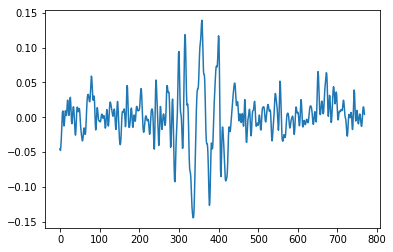

In [40]:
plt.plot(S_new[6])


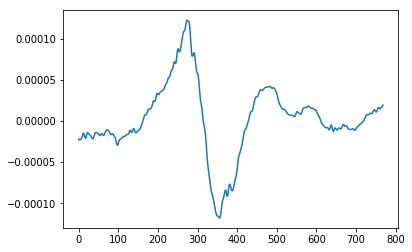

In [41]:
plt.plot(inv_EOG[0][6])

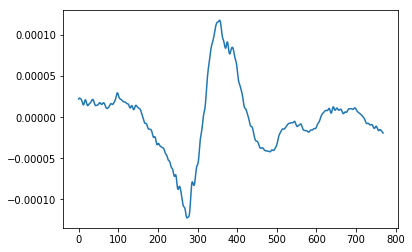

In [42]:
plt.plot(toSobi[0][6])